# Project: Wrangling and Analyze Data

In [66]:
# Load needed libraries for analysis
import pandas as pd 
import numpy as np
import os
import requests
import tweepy
import json 
import glob
import time
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [67]:
#load and read archive csv file
archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [68]:
# Download and read image prediction file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode ='wb') as file:
    file.write(response.content)
    
    #Read TSV file
prediction = pd.read_csv('image_predictions.tsv', sep='\t' )

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
# connect to the api and initialize API

consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'Hidden'

# create an authorization using the consumer key and secret
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# set access uding your access token and secret
auth.set_access_token(access_token, access_secret)

#call the API
api = tweepy.API(auth, wait_on_rate_limit = True)

In [5]:
# this next line extracts the tweet ids from archive dataframe

# the tweet ids need to be stored in a variable that's iterable
tweet_ids = archive.tweet_id.values
print(type(tweet_ids))

<class 'numpy.ndarray'>


In [6]:
# check the number of tweets we'll be gathering data for
print(len(tweet_ids))

2356


In [7]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive

# initialize a counter to help track progress
count = 0

# create a dictionary to store the tweet ids that cannot be retrieved
fails_dict = {}

# start tracking the time taken to run the next lines of code
start = time.time()

# Save each tweet's returned JSON as a new line in a .txt file

# open the text file in write mode
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        # increment the counter with each tweet that's being queried
        count += 1
        # print the number and tweet id
        print(str(count) + ": " + str(tweet_id))
        try:
            # get the status of the tweet
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            # write the json data to the text file opened
            json.dump(tweet._json, outfile)
            # you're required to write each tweet on a new line so go to a new line
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            # write the tweet id that failed along with the error message to the fails_dict dictionary
            fails_dict[tweet_id] = e
            pass
end = time.time()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success


Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808

Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
10

Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
13

Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
15

Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
18

Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
20

Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
23

In [8]:
# The tweet_id of the errors
print("The lengh of the errors", len(fails_dict))

The lengh of the errors 29


In [9]:
# read the success data into a dataframe using pd.read_json
tweet = pd.read_json('tweet_json.txt', lines = True)

# save tweet api to csv 
tweet.to_csv('tweet.csv', index=False)

In [69]:
tweet = pd.read_csv('tweet.csv')

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [70]:
# assess data shape
archive.shape

(2356, 17)

In [11]:
# Display archive data table
archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1298,707741517457260545,NaN,NaN,2016-03-10 01:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When your roommate eats your leftover Chili's ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707741517...,10,10,None,None,None,None,None
57,881268444196462592,NaN,NaN,2017-07-01 21:49:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Elliot. He's a Canadian Forrest Pup. Unus...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881268444...,12,10,Elliot,None,None,None,None
70,879008229531029506,NaN,NaN,2017-06-25 16:07:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Beau. That is Beau's balloon. He takes...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879008229...,13,10,Beau,None,None,None,None
2238,668113020489474048,NaN,NaN,2015-11-21 17:05:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alfie. He's that one hypocritical gym ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668113020...,6,10,Alfie,None,None,None,None
2047,671518598289059840,NaN,NaN,2015-12-01 02:38:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scruffers. He's being violated on mult...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671518598...,9,10,Scruffers,None,None,None,None
2323,666428276349472768,NaN,NaN,2015-11-17 01:30:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an Austrian Pulitzer. Collectors ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666428276...,7,10,None,None,None,None,None
1027,746056683365994496,NaN,NaN,2016-06-23 19:05:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Arlen and Thumpelina. They are best pa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746056683...,11,10,Arlen,None,None,None,None
296,837366284874571778,NaN,NaN,2017-03-02 18:17:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She has a portrait of herself on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/837366284...,13,10,Lucy,None,None,None,None
1381,700890391244103680,NaN,NaN,2016-02-20 03:51:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chet. He's dapper af. His owners want ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700890391...,11,10,Chet,None,None,None,None
1132,728760639972315136,NaN,NaN,2016-05-07 01:37:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...","When you're way too slow for the ""down low"" po...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/728760639...,13,10,None,None,None,None,None


In [12]:
# display api data content
tweet.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",33806,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,7003,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",29321,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5301,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",22042,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3478,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",36926,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,7224,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",35308,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,7757,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [13]:
# display image prediction data content 
prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
372,672984142909456390,https://pbs.twimg.com/media/CVbrcZyVAAA5Wpq.jpg,1,wombat,0.738780,False,beaver,0.133368,False,wallaby,0.032370,False
521,676575501977128964,https://pbs.twimg.com/media/CWOt07EUsAAnOYW.jpg,1,feather_boa,0.424106,False,Yorkshire_terrier,0.073144,True,Shetland_sheepdog,0.057598,True
1145,730427201120833536,https://pbs.twimg.com/media/CiL_qh0W0AAu5VA.jpg,1,Eskimo_dog,0.682082,True,Siberian_husky,0.289288,True,Staffordshire_bullterrier,0.008771,True
128,668274247790391296,https://pbs.twimg.com/media/CUYv4d2WUAAziXs.jpg,1,soft-coated_wheaten_terrier,0.406374,True,Lakeland_terrier,0.263854,True,toy_poodle,0.150844,True
438,674422304705744896,https://pbs.twimg.com/media/CVwHgblWcAACWOD.jpg,1,golden_retriever,0.964497,True,Labrador_retriever,0.009006,True,tennis_ball,0.007139,False
916,701545186879471618,https://pbs.twimg.com/media/CbxjnyOWAAAWLUH.jpg,1,Border_collie,0.280893,True,Cardigan,0.112550,True,toy_terrier,0.053317,True
754,688211956440801280,https://pbs.twimg.com/ext_tw_video_thumb/68821...,1,bannister,0.369449,False,four-poster,0.105307,False,shoji,0.098767,False
2023,881536004380872706,https://pbs.twimg.com/ext_tw_video_thumb/88153...,1,Samoyed,0.281463,True,Angora,0.272066,False,Persian_cat,0.114854,False
319,671768281401958400,https://pbs.twimg.com/media/CVKZsHtWwAA6gPj.jpg,2,Chihuahua,0.500373,True,French_bulldog,0.112796,True,Italian_greyhound,0.062893,True
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True


In [14]:
# assess datatypes/counts information for api data
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2327 non-null datetime64[ns]
display_text_range               2327 non-null object
entities                         2327 non-null object
extended_entities                2057 non-null object
favorite_count                   2327 non-null int64
favorited                        2327 non-null bool
full_text                        2327 non-null object
geo                              0 non-null float64
id                               2327 non-null int64
id_str                           2327 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [15]:
# assess datatypes/counts information for image prediction
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
# assess datatypes/counts information for archive
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
# assess if there are any records in archive which are retweets
len(archive[archive.retweeted_status_id.isnull() == False])

181

In [18]:
# assess ratings numerator figures that are suspect
archive.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [19]:
# assess ratings denominator figures that are suspect
archive.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

### Quality issues
1. missing values in both archive and tweets dataframes

2. incorrect datatpyes in colunns

3. non descriptive column names in archive dataframe

4. contains retweets and therefore duplicates.

5. unnecessary html tags in source column of twitter archive in place of utility name

6. ratings dednomitor has some value other other 10

7. ratings numerator has some very large outliers value

8. erroneous dog names starting with lowercase characters 

9. "dog_breed" column should be added ; its values based on p1_conf, p2_conf, p3_conf and p1_dog, p2_dog, p3_dog columns of image predictions table


### Tidiness issues
1. unneccessary columns not needed for anaylsis

2. doggo, floofer, pupper and puppo columns should be merged into one column named "dog_stage"

3. all data tables should be a single analysis table

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [85]:
# Make copies of original pieces of data
archive_clean = archive.copy()
tweet_clean = tweet.copy()
prediction_clean =prediction.copy()

### Issue #1: all dataframes should be a single file 

#### Define: merge all copy dataframes using common identifier

#### Code

In [86]:
# Rename id column to tweet_id in api data to create column indentifier name with other data source.
tweet_clean = tweet_clean.rename(columns={'id': 'tweet_id'})

#  merge dataframes and save the result in file as backup
master_clean = pd.merge(archive_clean, prediction_clean, how = 'left', on = ['tweet_id'] )
master_clean = pd.merge(master_clean, tweet_clean, how = 'left', on = ['tweet_id'])
master_clean.to_csv('master_clean.csv', index=False)

#### Test

In [87]:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 59 columns):
tweet_id                         2356 non-null int64
in_reply_to_status_id_x          78 non-null float64
in_reply_to_user_id_x            78 non-null float64
timestamp                        2356 non-null object
source_x                         2356 non-null object
text                             2356 non-null object
retweeted_status_id              181 non-null float64
retweeted_status_user_id         181 non-null float64
retweeted_status_timestamp       181 non-null object
expanded_urls                    2297 non-null object
rating_numerator                 2356 non-null int64
rating_denominator               2356 non-null int64
name                             2356 non-null object
doggo                            2356 non-null object
floofer                          2356 non-null object
pupper                           2356 non-null object
puppo                            23

### Issue #2: retweet id implies duplicate and reply is not original tweets 

#### Define 
remove status relating to retweets, reply, and drop other columns not needed in the analysis

#### Code

In [88]:
# Remove the retweet information 
master_clean=master_clean[master_clean.retweeted_status_id.isnull()]
master_clean=master_clean[master_clean.retweeted_status_user_id.isnull()]
master_clean=master_clean[master_clean.retweeted_status_timestamp.isnull()]

In [89]:
# Remove the replies information 
master_clean=master_clean[master_clean.in_reply_to_status_id_x.isnull()]
master_clean=master_clean[master_clean.in_reply_to_user_id_x.isnull()]

In [90]:
# Drop retweet, duplicates column imported from api join, and other unneccary columnns imported from api joined.
master_clean.drop(['entities','extended_entities', 'retweeted_status_id', 'retweeted_status_user_id', 
                   'retweeted_status_timestamp', 'full_text', 'source_y', 'contributors', 'coordinates',
                   'geo', 'id_str','in_reply_to_screen_name', 'in_reply_to_status_id_str','in_reply_to_user_id_str',
                   'is_quote_status','lang','place','possibly_sensitive','possibly_sensitive_appealable','quoted_status'
                   ,'quoted_status_id','quoted_status_id_str','quoted_status_permalink','retweeted_status',
                   'truncated','user','created_at', 'in_reply_to_user_id_y', 'in_reply_to_user_id_x','display_text_range',
                   'in_reply_to_status_id_x', 'in_reply_to_status_id_y', 'retweeted', 'favorited'], axis=1, inplace=True)

#### Test

In [91]:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source_x              2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-nu

### Issue #3: source column content wrapped in html anchor tag

#### Define 
strip anchor tags of text and convert datatype to category

#### Code

In [92]:
#strip anchor tags
master_clean['source_x'] = master_clean['source_x'].str.replace(r'<(?:a\b[^>]*>|/a>)', '')

#### Test

In [93]:
master_clean['source_x'].value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source_x, dtype: int64

In [94]:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source_x              2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-nu

### Issue #4: dog stages in separate columns

#### Define 
merge 'doggo', 'floofer', 'pupper' and 'puppo' columns into one column 'dog_stage'

#### Code

In [96]:
# fill none values with empty space
master_clean.doggo.replace('None', '', inplace=True)
master_clean.floofer.replace('None', '', inplace=True)
master_clean.pupper.replace('None', '', inplace=True)
master_clean.puppo.replace('None', '', inplace=True)


# combine dog_stages into a single column
master_clean['dog_stage'] = master_clean.doggo + master_clean.floofer + master_clean.pupper + master_clean.puppo

# fix multiple stage rows
master_clean.loc[master_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
master_clean.loc[master_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
master_clean.loc[master_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# Handle missing values
master_clean.loc[master_clean.dog_stage == '', 'dog_stage'] = np.nan

# drop previous dog stage columns
master_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [98]:
# test
master_clean['dog_stage'].value_counts()

pupper            221
doggo              72
puppo              23
floofer             9
doggo, pupper       9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

### Issue #5: Some dog names starting lower case character

#### Define replace first letter with capital letters for all dog names

#### Code

In [99]:
# capitalise first letters
master_clean['name'] = master_clean['name'].str.title()

#### Test

In [100]:
master_clean['name'].value_counts()

None         603
A             55
Charlie       11
Lucy          11
Oliver        10
Cooper        10
Tucker         9
Penny          9
Lola           8
Sadie          8
The            8
Winston        8
Toby           7
Daisy          7
Stanley        6
An             6
Koda           6
Jax            6
Bailey         6
Bella          6
Bo             6
Oscar          6
Buddy          5
Milo           5
Rusty          5
Leo            5
Bentley        5
Scout          5
Chester        5
Dave           5
            ... 
Jameson        1
Opie           1
Oddie          1
Nimbus         1
Hazel          1
Dondon         1
Tito           1
Tupawc         1
Goose          1
Fwed           1
Bloop          1
Shaggy         1
Anthony        1
Rumble         1
Donny          1
Grady          1
Marq           1
Ozzie          1
Corey          1
Harrison       1
Stephan        1
Gert           1
Bertson        1
Combo          1
Jeffrie        1
Sid            1
Gustaf         1
Bones         

### Issue #6: dog breeds in mutiple columns and under non descriptive headings

#### Define

extract dog breeds from p1_dog, p2_dog, p3_dog into a single column base on confidence value from p1_conf, p2_conf, p3_conf

#### Code

In [101]:
# store the fisrt true dog breed algorithm with it's level of confidence
dog_breed = []
confidence_level = []

# look-up the first true algorithm and append it to a list with it's level of confidence
# and, if flase prediction_algorthm, it will have a value of NaN
def get_breed_confidence(dataframe):
    if dataframe['p1_dog'] == True:
        dog_breed.append(dataframe['p1'])
        confidence_level.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        dog_breed.append(dataframe['p2'])
        confidence_level.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        dog_breed.append(dataframe['p3'])
        confidence_level.append(dataframe['p3_conf'])
    else:
        dog_breed.append('NaN')
        confidence_level.append(0)

master_clean.apply(get_breed_confidence, axis=1)
master_clean['dog_breed'] = dog_breed
master_clean['confidence_level'] = confidence_level

# Delete the columns of image prediction information
master_clean = master_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

#### Test

In [102]:
list(master_clean)

['tweet_id',
 'timestamp',
 'source_x',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'jpg_url',
 'favorite_count',
 'retweet_count',
 'dog_stage',
 'dog_breed',
 'confidence_level']

In [104]:
master_clean[['dog_breed', 'confidence_level']].sample(5)

,dog_breed,confidence_level
1481,Labrador_retriever,0.340008
1129,German_shepherd,0.829307
1784,NaN,0.000000
2226,soft-coated_wheaten_terrier,0.406374
990,NaN,0.000000


### Issue #7: Denominator has value other than 10 and Numerator has value outlier values

#### Define:
extract original ratings from text column and append it to rating_numerator and rating_denominator respectively

#### Code

In [105]:
# Extract ratings from 'text' column and attribute them to'rating_numerator' and 'rating_denominator'column
master_clean[['rating_numerator','rating_denominator']]= master_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)',expand=True)

# ensure datatype is float
master_clean['rating_numerator'] = master_clean['rating_numerator'].astype('float64')
master_clean['rating_denominator'] = master_clean['rating_denominator'].astype('float64')

# Keep only rows where numerator is between 1-14 and the denominator is 10
master_clean = master_clean[(master_clean.rating_numerator > 0) & (master_clean.rating_numerator < 15) &
                          (master_clean.rating_denominator == 10)]

<font color='purple'>The rational for excluding numerator greater than 14 is that the count is about 1% of total numerator counts hence not significant. while the sum of the extreme values is is taking a huge % of the total values sum.

Since all outlier numerator has been eliminated, we will stick to the assumption that denominator is almost always 10 to serve as a moderate rating benchmark thereby removing all muddled-up dogs tweet count.</font>

#### Test

In [106]:
#test total rating_denominator which still has value more than 10
master_clean.rating_denominator.value_counts().sort_index()

10.0    2077
Name: rating_denominator, dtype: int64

In [107]:
master_clean.rating_numerator.value_counts()

12.00    486
10.00    436
11.00    413
13.00    287
9.00     152
8.00      98
7.00      51
14.00     38
5.00      33
6.00      32
3.00      19
4.00      15
2.00       9
1.00       4
11.27      1
13.50      1
11.26      1
9.75       1
Name: rating_numerator, dtype: int64

### Issue #8: null values inputed as "NaN"

#### Define
Convert the null "NaN" values to None type

#### Code

In [108]:
master_clean = master_clean.replace({np.nan: None})

#### Test

In [109]:
master_clean.sample(5)

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,favorite_count,retweet_count,dog_stage,dog_breed,confidence_level
786,774757898236878852,2016-09-10 23:54:11 +0000,Twitter for iPhone,This is Finley. She's a Beneboop Cumbersplash....,https://twitter.com/dog_rates/status/774757898...,12,10,Finley,https://pbs.twimg.com/media/CsB-MYiXgAEQU20.jpg,8134,1656,None,toy_poodle,0.719941
60,880465832366813184,2017-06-29 16:39:47 +0000,Twitter for iPhone,This is Bella. She had her first beach experie...,https://twitter.com/dog_rates/status/880465832...,12,10,Bella,https://pbs.twimg.com/media/DDgK-J4XUAIEV9W.jpg,25029,5211,None,golden_retriever,0.913255
721,783334639985389568,2016-10-04 15:55:06 +0000,Twitter for iPhone,This is Dave. He's currently in a predicament....,https://twitter.com/dog_rates/status/783334639...,12,10,Dave,https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg,27496,10885,None,Cardigan,0.593858
350,831552930092285952,2017-02-14 17:17:22 +0000,Twitter for iPhone,This is Dutch. He dressed up as his favorite e...,https://twitter.com/dog_rates/status/831552930...,13,10,Dutch,https://pbs.twimg.com/media/C4pE-I0WQAABveu.jpg,8465,2163,None,Chihuahua,0.257415
978,749996283729883136,2016-07-04 16:00:22 +0000,TweetDeck,This is Bo. He emanates happiness. 12/10 I cou...,https://twitter.com/dog_rates/status/749996283...,12,10,Bo,https://pbs.twimg.com/media/CmfoyrrW8AA8v7w.jpg,2836,756,None,Old_English_sheepdog,0.515319


### Issue #9: Incorrect datatypes

#### Define
Convert columns to the appropriate datatypes

#### Code

In [110]:
# check to identify what to convert
master_clean.dtypes

tweet_id               int64
timestamp             object
source_x              object
text                  object
expanded_urls         object
rating_numerator      object
rating_denominator    object
name                  object
jpg_url               object
favorite_count        object
retweet_count         object
dog_stage             object
dog_breed             object
confidence_level      object
dtype: object

In [111]:
# fill null values for "int" colunms 
master_clean['favorite_count'] = master_clean['favorite_count'].fillna(0)
master_clean['retweet_count'] = master_clean['retweet_count'].fillna(0)

# Convert to correct datatypes
master_clean['tweet_id'] = master_clean['tweet_id'].astype('object')
master_clean['timestamp'] = pd.to_datetime(master_clean['timestamp']).dt.date.astype('datetime64[ns]')
master_clean['source_x'] = master_clean['source_x'].astype('category')
master_clean['rating_numerator'] = master_clean['rating_numerator'].astype('float64')
master_clean['rating_denominator'] = master_clean['rating_denominator'].astype('float64')
master_clean['favorite_count'] = master_clean['favorite_count'].astype('int64')
master_clean['retweet_count'] = master_clean['retweet_count'].astype('int64')
master_clean['dog_stage'] = master_clean['dog_stage'].astype('category')
master_clean['dog_breed'] = master_clean['dog_breed'].astype('category')
master_clean['confidence_level'] = master_clean['confidence_level'].astype('float64')

#### Test

In [112]:
master_clean.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source_x                    category
text                          object
expanded_urls                 object
rating_numerator             float64
rating_denominator           float64
name                          object
jpg_url                       object
favorite_count                 int64
retweet_count                  int64
dog_stage                   category
dog_breed                   category
confidence_level             float64
dtype: object

### Issue #6: Other Cleaning Issues

#### Drop rating_denominator as it has one value '10' and  rename columns to be more expressive and Clean if needed

In [113]:
# drop rating_denominator column
print(master_clean.rating_denominator.value_counts())
master_clean.drop('rating_denominator', 1, inplace = True)

10.0    2077
Name: rating_denominator, dtype: int64


In [114]:
# remane column to be more expressive
master_clean  = master_clean.rename(columns = {'timestamp': 'tweet_date', 'source_x': 'tweet_source', 'text': 'tweet_text',
                                               'expanded_urls': 'tweet_url','name': 'dog_name', 'jpg_url': 'tweet_picture',
                                               'favorite_count': 'tweet_favorites', 'retweet_count': 'tweet_retweets'})

#### Test

In [115]:
list(master_clean)

['tweet_id',
 'tweet_date',
 'tweet_source',
 'tweet_text',
 'tweet_url',
 'rating_numerator',
 'dog_name',
 'tweet_picture',
 'tweet_favorites',
 'tweet_retweets',
 'dog_stage',
 'dog_breed',
 'confidence_level']

In [116]:
master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id            2077 non-null object
tweet_date          2077 non-null datetime64[ns]
tweet_source        2077 non-null category
tweet_text          2077 non-null object
tweet_url           2074 non-null object
rating_numerator    2077 non-null float64
dog_name            2077 non-null object
tweet_picture       1951 non-null object
tweet_favorites     2077 non-null int64
tweet_retweets      2077 non-null int64
dog_stage           336 non-null category
dog_breed           2077 non-null category
confidence_level    2077 non-null float64
dtypes: category(3), datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 191.0+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [117]:
master_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [118]:
master_df = pd.read_csv('twitter_archive_master.csv')
master_df.sample(2)

,tweet_id,tweet_date,tweet_source,tweet_text,tweet_url,rating_numerator,dog_name,tweet_picture,tweet_favorites,tweet_retweets,dog_stage,dog_breed,confidence_level
1721,672640509974827008,2015-12-04,Twitter for iPhone,This is Leonidas. He just got rekt by a snowba...,https://twitter.com/dog_rates/status/672640509...,9.0,Leonidas,https://pbs.twimg.com/media/CVWy9v-VAAALSoE.jpg,875,271,NaN,Chesapeake_Bay_retriever,0.420155
1829,670691627984359425,2015-11-28,Twitter for iPhone,This is Ester. He has a cocaine problem. This ...,https://twitter.com/dog_rates/status/670691627...,8.0,Ester,https://pbs.twimg.com/media/CU7GehOUYAA9nn-.jpg,519,209,NaN,Shetland_sheepdog,0.071124


In [119]:
# shape of data frame
master_df.shape

(2077, 13)

In [120]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077 entries, 0 to 2076
Data columns (total 13 columns):
tweet_id            2077 non-null int64
tweet_date          2077 non-null object
tweet_source        2077 non-null object
tweet_text          2077 non-null object
tweet_url           2074 non-null object
rating_numerator    2077 non-null float64
dog_name            2077 non-null object
tweet_picture       1951 non-null object
tweet_favorites     2077 non-null int64
tweet_retweets      2077 non-null int64
dog_stage           336 non-null object
dog_breed           1649 non-null object
confidence_level    2077 non-null float64
dtypes: float64(2), int64(3), object(8)
memory usage: 211.0+ KB


### Insights:

#### 1. Dog ratings above 10

In [121]:
master_df['rating_numerator'][master_df['rating_numerator'] >= 10].value_counts().sum()

1663

<font color='green'>The analysis shows that about 80% dog rated above 10 while only about 20% rates below score 10 </font> 

#### 2. Correlation between favourites and retweets / favourites and rating

In [122]:
# correlation between favourites and retweets
master_df['tweet_favorites'].corr(master_df['tweet_retweets'])

0.92592121691017537

In [123]:
# correlation between favourites and rating
master_df['tweet_favorites'].corr(master_df['rating_numerator']) 

0.39582121577535401

<font color='green'>The result shows existence of a strong positive relationship between tweets and retweets. whereas favourite tweets and ratings suggest no or little relationship</font>

#### 3. The most popular Dog Breed Twitted

In [124]:
popular_breed= master_df['dog_breed'].value_counts().head()
popular_breed

golden_retriever      153
Labrador_retriever    103
Pembroke               94
Chihuahua              89
pug                    62
Name: dog_breed, dtype: int64

<font color='green'>golden_retriever is the most popular dog breed posted by WeRateDogs</font>

#### 3. Most Used Twitter Source

In [136]:
tweet_source = master_df['tweet_source'].value_counts()
tweet_source

Twitter for iPhone     1945
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                10
Name: tweet_source, dtype: int64

<font color='purple'>WeRateDogs posted 93.6% of the tweets from iPhone.</font>

### Visualization

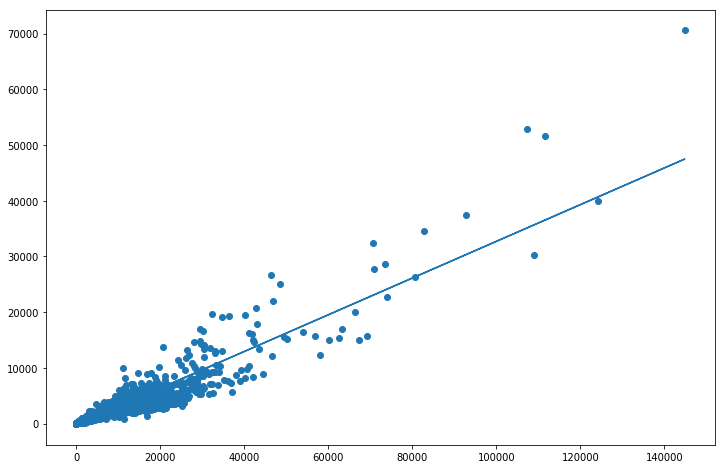

In [142]:
x = np.array(master_df['tweet_favorites'])
y = np.array(master_df['tweet_retweets'])

#create scatterplot
plt.scatter(x, y)

#calculate equation for trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(x, p(x))

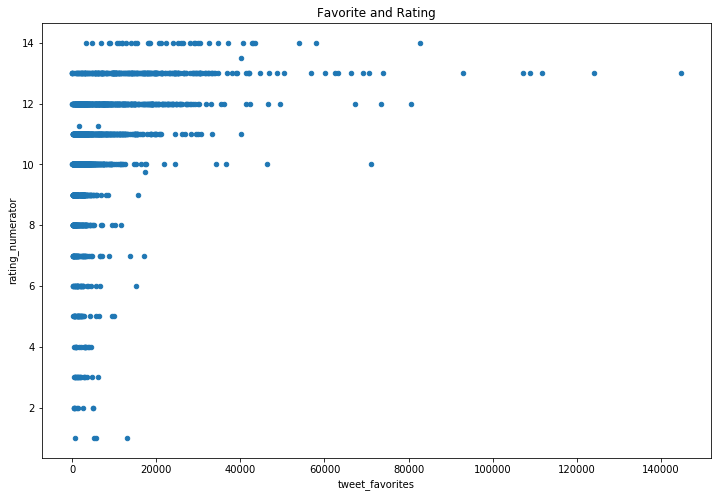

In [143]:
# plot correlation between favourites and rating
master_df.plot(x='tweet_favorites', y='rating_numerator', kind='scatter', title = 'Favorite and Rating');

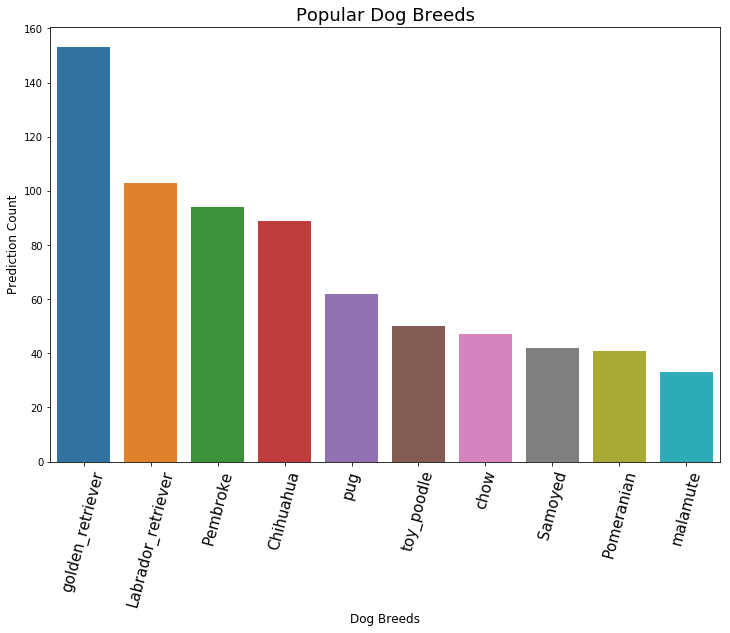

In [128]:
# visualise popular dog breed twitted
plt.figure(figsize = (12,8))
ax = sns.barplot(x = master_df['dog_breed'].value_counts()[0:10].index,
            y =master_df['dog_breed'].value_counts()[0:10],
            data = master_df);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 75, fontsize = 15);
plt.xlabel("Dog Breeds",fontsize = 12);
plt.ylabel("Prediction Count",fontsize = 12);
plt.title("Popular Dog Breeds",fontsize = 18);

Text(0,0.5,'')

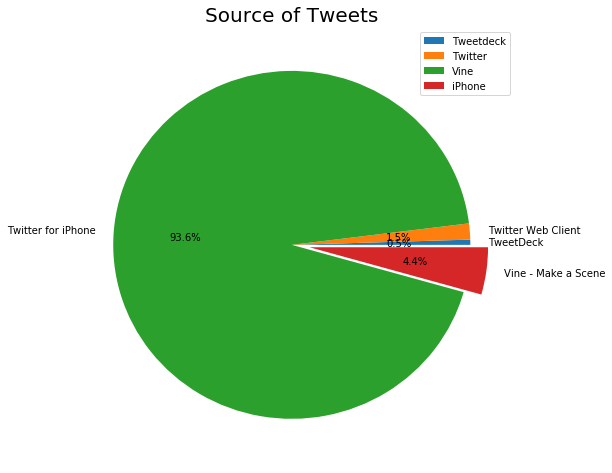

In [129]:
# Plot most used source of tweet
tweet_source = master_df.groupby('tweet_source').count()[['tweet_id']]
tweet_source['source_percentage'] = tweet_source.tweet_id / tweet_source.tweet_id.sum() * 100
tweet_source['source_percentage'].plot.pie(figsize=(8,8), autopct='%1.1f%%',
        explode=(0,0,0,0.1))
plt.title("Source of Tweets", {'fontsize': 20})
plt.legend(["Tweetdeck", "Twitter", "Vine", "iPhone"])
plt.ylabel("")

#### Trends of tweets over time

In [144]:
master_df["tweet_date"].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()

2015-11    294
2015-12    370
2016-01    181
2016-02    119
2016-03    129
2016-04     58
2016-05     58
2016-06     89
2016-07     94
2016-08     61
2016-09     69
2016-10     72
2016-11     54
2016-12     56
2017-01     68
2017-02     67
2017-03     52
2017-04     42
2017-05     43
2017-06     48
2017-07     51
2017-08      2
Name: tweet_date, dtype: int64

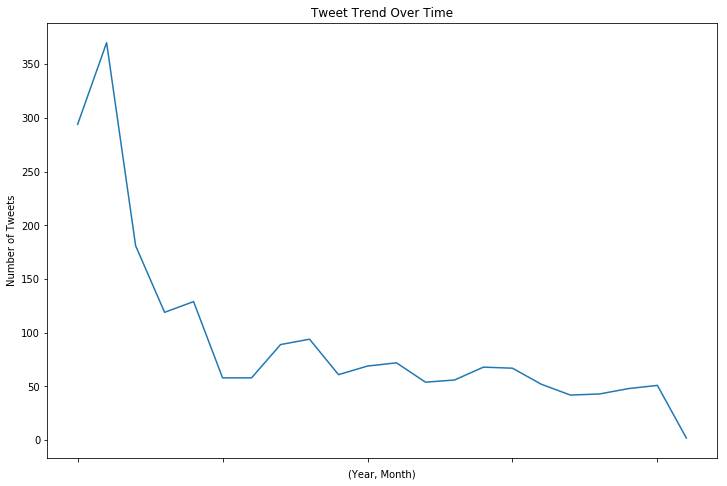

In [145]:
# make sure tweet_date is datetime format
master_df["tweet_date"] = pd.to_datetime(master_df["tweet_date"])

# Plot
plt.rcParams["figure.figsize"] = [12, 8]
data = master_df.tweet_id.groupby([master_df["tweet_date"].dt.year, master_df["tweet_date"].dt.month]).count()
ax = data.plot('line', title='Tweet Trend Over Time')
ax.set_xlabel("(Year, Month)")
ax.set_ylabel("Number of Tweets")
plt.show()

In [153]:
# Sample Text for Visuals report
master_clean.tweet_text=master_clean.tweet_text+''
master_clean.tweet_text=master_clean.tweet_text.apply(lambda x:x[: x.find("http")]).str.strip()
master_clean.tweet_text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10"